In [62]:
include(joinpath(dirname(Base.active_project()), "src", "AutoSpider.jl"))
using .AutoSpider, HDF5

include(joinpath(AutoSpider.FUNCTION_PATH, "VizUtils.jl"))
using .VizUtils

viz_dict::Dict = Dict()

orders::Array{Int} = [2,3,4,5,6]

for i in eachindex(orders)
    viz_dict[i] = Dict()
    path::String = joinpath(AutoSpider.HDF5_PATH, "orszag-tang", "64x64", "orszag-tang-RK" * repr(orders[i]) * ".hdf5")
    h5open(path, "r") do file
        viz_dict[i]["p"] = read(file, "result/value/p/value")
    end
end

[0.5, 0.5271865672341461, 0.6057217021657251, 0.7067581660711473, 0.7955334735261677, 0.8400547859674363, 0.8270598720830271, 0.7673458499177915, 0.6830007532234443, 0.5934991770411852]


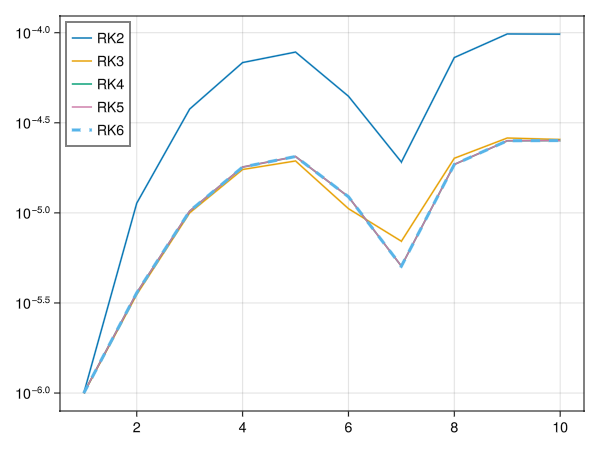

In [64]:
using Statistics, LinearAlgebra, GLMakie

tmax=10
tr = 1:tmax
tsqsum(x) = [mean(x[:,:,t].^2) for t = 1:tmax]

psums::Vector{Vector{Float64}} = []
for i in eachindex(orders)
    push!(psums, tsqsum(viz_dict[i]["p"]))
end

mins::Vector{Float64} = []
for t in 1:tmax
    push!(mins, mean(permutedims(hcat(psums...))[:,t]))
end

println(mins)

f = Figure()
ax = Axis(f[1, 1], yscale=log10)
lines!(ax, tr, abs.(psums[1] - mins) .+ 1e-6, label="RK2")
lines!(ax, tr, abs.(psums[2] - mins) .+ 1e-6, label="RK3")
lines!(ax, tr, abs.(psums[3] - mins) .+ 1e-6, label="RK4")
lines!(ax, tr, abs.(psums[4] - mins) .+ 1e-6, label="RK5")
lines!(ax, tr, abs.(psums[5] - mins) .+ 1e-6, label="RK6", linewidth=3, linestyle = :dash)

axislegend(position = :lt)

f

In [79]:
model_results::Dict = Dict()

for i in eachindex(orders)
    path::String = joinpath(AutoSpider.HDF5_PATH, "orszag-tang", "64x64", "orszag-tang-RK" * repr(orders[i]) * ".hdf5")
    model_results[i] = AutoSpider.auto_spider(path, joinpath("compare", "settings_64.json"))
    println()
end

∂u/∂x + ∂v/∂y = 0
∂v/∂t + ∂uv/∂x + ∂v^2/∂y - 0.01∂^2v/∂x^2 - 0.01∂^2v/∂y^2 + ∂P/∂y - ∂By^2/∂y - ∂BxBy/∂x = 0
∂By/∂t - 0.01∂^2By/∂x^2 - 0.01∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
∂u/∂t + ∂u^2/∂x + ∂uv/∂y - 0.01∂^2u/∂x^2 - 0.01∂^2u/∂y^2 + ∂P/∂x - ∂Bx^2/∂x - ∂BxBy/∂y = 0
∂Bx/∂t - 0.01∂^2Bx/∂x^2 - 0.01∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0

∂u/∂x + ∂v/∂y = 0
∂Bx/∂t - 0.01∂^2Bx/∂x^2 - 0.01∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0
∂By/∂t - 0.01∂^2By/∂x^2 - 0.01∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
∂u/∂t + ∂u^2/∂x + ∂uv/∂y - 0.01∂^2u/∂x^2 - 0.01∂^2u/∂y^2 + ∂P/∂x - ∂Bx^2/∂x - ∂BxBy/∂y = 0
∂v/∂t + ∂uv/∂x + ∂v^2/∂y - 0.01∂^2v/∂x^2 - 0.01∂^2v/∂y^2 + ∂P/∂y - ∂By^2/∂y - ∂BxBy/∂x = 0

∂By/∂t - 0.01∂^2By/∂x^2 - 0.01∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
∂Bx/∂t - 0.01∂^2Bx/∂x^2 - 0.01∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0
∂u/∂x + ∂v/∂y = 0
∂u/∂t + ∂u^2/∂x + ∂uv/∂y - 0.01∂^2u/∂x^2 - 0.01∂^2u/∂y^2 + ∂P/∂x - ∂Bx^2/∂x - ∂BxBy/∂y = 0
∂v/∂t + ∂uv/∂x + ∂v^2/∂y - 0.01∂^2v/∂x^2 - 0.01∂^2v/∂y^2 + ∂P/∂y - ∂By^2/∂y - ∂BxBy/∂x = 0

∂By/∂t 

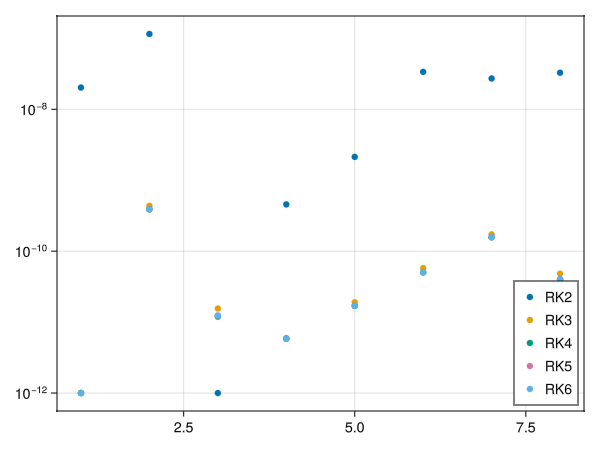

In [82]:
# u momentum equation coefficient differences

dom = 1:maximum([length(model_results[i][5]["coeff"]) for i in eachindex(orders)])

f = Figure()
ax = Axis(f[1, 1], yscale=log10)

ideal = [1., 1., 1., -0.01, -0.01, 1., -1., -1.]

scatter!(ax, dom, (ideal - model_results[1][2]["coeff"]).^2 .+ 1e-12, label="RK2")
scatter!(ax, dom, (ideal - model_results[2][5]["coeff"]).^2 .+ 1e-12, label="RK3")
scatter!(ax, dom, (ideal - model_results[3][5]["coeff"]).^2 .+ 1e-12, label="RK4")
scatter!(ax, dom, (ideal - model_results[4][5]["coeff"]).^2 .+ 1e-12, label="RK5")
scatter!(ax, dom, (ideal - model_results[5][5]["coeff"]).^2 .+ 1e-12, label="RK6")

axislegend(position = :rb)
f

In [78]:
for j in eachindex(orders)
    for i = 1:5
        println(model_results[j][i]["coeff"])
    end
    println()
end

[0.9999998231883528, 1.0]
[0.9997167366890607, 0.9999285164624795, 1.0, -0.010016902988893746, -0.00998188617120994, 0.9999533817163585, -0.9999736010147459, -0.9999616054762043]
[0.9996972796412226, 0.9996653445967351, 1.0, -0.009951621443211302, -0.010010389077898953, 0.9998891988756266, -0.9999036081162014, -0.9999036721190571]
[0.9997346021349909, -0.0099949026926863, -0.009986886655937006, 0.9999844643990716, -1.0]
[0.9997114104080972, -0.009969113982400364, -0.010000182639467184, -1.0, 0.9999450163765355]

[0.9999998195625589, 1.0]
[0.9997045237600048, -0.009983907698558704, -0.010001000957140918, -1.0, 0.9999933339666097]
[0.9997144224461562, 0.9999567853538303, 0.9999755081385255, -0.00998171764216061, -0.009988079793431217, 0.9999942864801679, -0.9999828078616751, -1.0]
[0.9997119906519949, 0.9999932460231289, 0.9999761150029005, -0.009996513860938866, -0.010000636316692157, 0.9999917752734078, -1.0, -0.9999946270105184]
[0.9997283211475807, -0.010000398092320749, -0.009996301